<a href="https://colab.research.google.com/github/r021n/simple-machine-learing/blob/main/Klasifikasi_Bunga_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 1: EDA (Exploratory Data Analysis)

## Memuat Dataset

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


## Melihat Bentuk dan Struktur Data

In [2]:
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data setiap kolom:")
print(df.dtypes)
print("\nJumlah data per spesies:")
print(df['species_name'].value_counts())

Jumlah baris dan kolom: (150, 6)

Tipe data setiap kolom:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

Jumlah data per spesies:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Statistik Dasar

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Mengecek Data Kosong

In [4]:
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())

Jumlah data kosong per kolom:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


## Visualisasi: Histogram

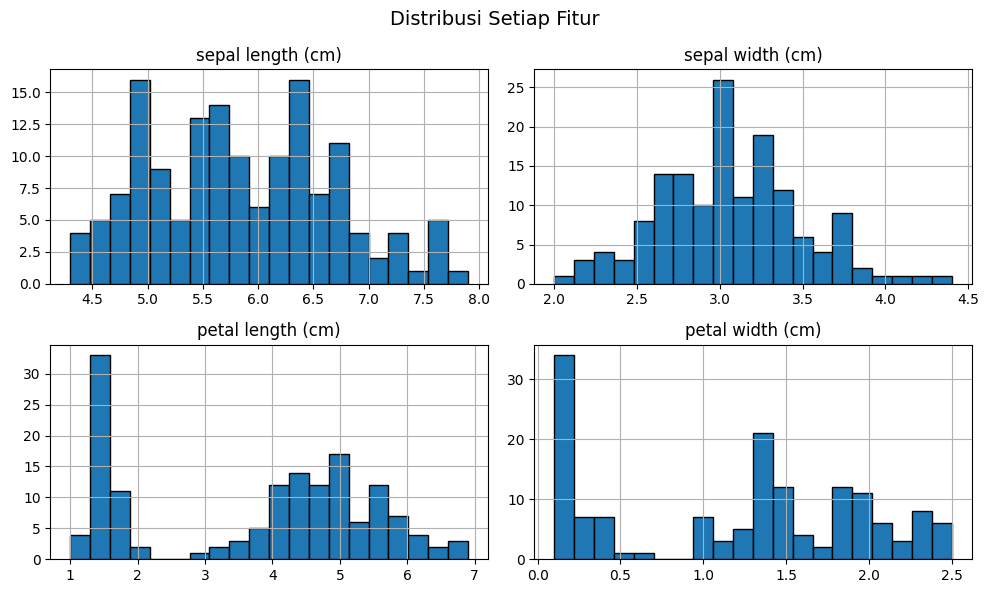

In [5]:
import matplotlib.pyplot as plt

df[iris.feature_names].hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur', fontsize=14)
plt.tight_layout()
plt.show()

## Visualisasi: Scatter Plot

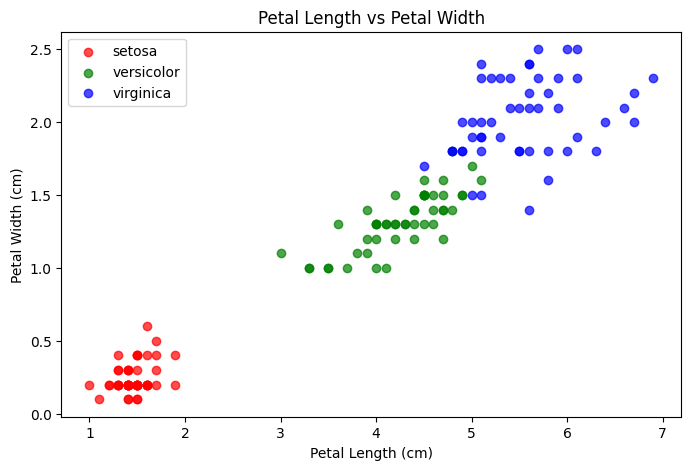

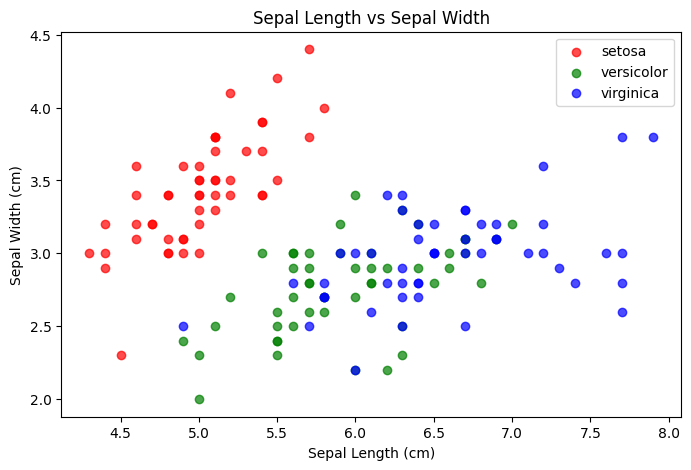

In [6]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

plt.figure(figsize=(8, 5))
for species_name, group in df.groupby('species_name'):
  plt.scatter(group['petal length (cm)'], group['petal width (cm)'],
              label=species_name, color=colors[species_name], alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
for species_name, group in df.groupby('species_name'):
  plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'],
              label=species_name, color=colors[species_name], alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

# Fase 2: Preprocessing

## Memisahkan Fitur dan Target

In [7]:
X = df[iris.feature_names]
y = df['species']

print("Bentuk X:", X.shape)
print("Bentuk y:", y.shape)

Bentuk X: (150, 4)
Bentuk y: (150,)


## Membagi Data Latih dan Data Uji

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 120
Jumlah data uji: 30


## Feature Scaling (Normalisasi)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)